In [1]:
import matplotlib.pyplot as plt 
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
import numpy as np 

## 1. Create synthetic dataset

In [2]:
n_samples = 30 
X = np.sort(np.random.rand(n_samples))
X

array([0.00335394, 0.04865358, 0.05813675, 0.12218467, 0.16400929,
       0.18133428, 0.20107862, 0.25063022, 0.25410853, 0.27555543,
       0.27624322, 0.29528074, 0.32990434, 0.34146354, 0.36808441,
       0.38233681, 0.39652789, 0.42998255, 0.43387556, 0.47154554,
       0.50098745, 0.52908714, 0.62700616, 0.72784489, 0.74762543,
       0.78400114, 0.8341407 , 0.87256835, 0.93039761, 0.9344609 ])

In [3]:
def true_function(X):
    return np.cos(1.5*np.pi * X)
y = true_function(X) + np.random.rand(n_samples) * 0.2 
y

array([ 1.05455501,  1.0113478 ,  1.1190665 ,  0.97909257,  0.74392203,
        0.68420606,  0.66032954,  0.47714662,  0.45629496,  0.36037926,
        0.46485614,  0.18945736,  0.03095523,  0.10428373,  0.00574783,
       -0.16497359, -0.25005313, -0.33918239, -0.37854682, -0.51166326,
       -0.54802189, -0.60444344, -0.86309509, -0.82738577, -0.89898085,
       -0.75249791, -0.51729459, -0.42029812, -0.15184375, -0.28327629])

In [4]:
X = X.reshape(-1,1)
X.shape 

(30, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((21, 1), (21,), (9, 1), (9,))

## 2. function to calculate metrics

In [6]:
def calculate_model_metrics(model, X_train, y_train,X_test ,y_test, n_iterations=100):
    train_preds = []
    # test_preds = np.zeros((n_iterations, len(X_test)))
    test_preds = np.zeros((n_iterations, len(X_test)))
    # print(test_preds)
    for i in range(n_iterations):

        idx = np.random.choice(len(X_train), len(X_train), replace=True)
        X_resampled = X_train[idx]
        y_resampled = y_train[idx]

        model.fit(X_resampled, y_resampled)
        train_preds.append(model.predict(X_train))
        test_preds[i] = model.predict(X_test)
       
    mean_test_pred = np.mean(test_preds, axis = 0)
    bias_squared = np.mean((y_test - mean_test_pred) ** 2)
    variance = np.mean(np.var(test_preds, axis= 0))

    train_r2 = r2_score(y_train, np.mean(train_preds, axis=0))
    test_r2 = r2_score(y_test, mean_test_pred)
    return {
        "bias_squared": bias_squared,
        "variance": variance,
        "total_error": bias_squared + variance,
        "train_r2": train_r2,
        "test_r2": test_r2
    }


## 3. Evaluate models with different complexities

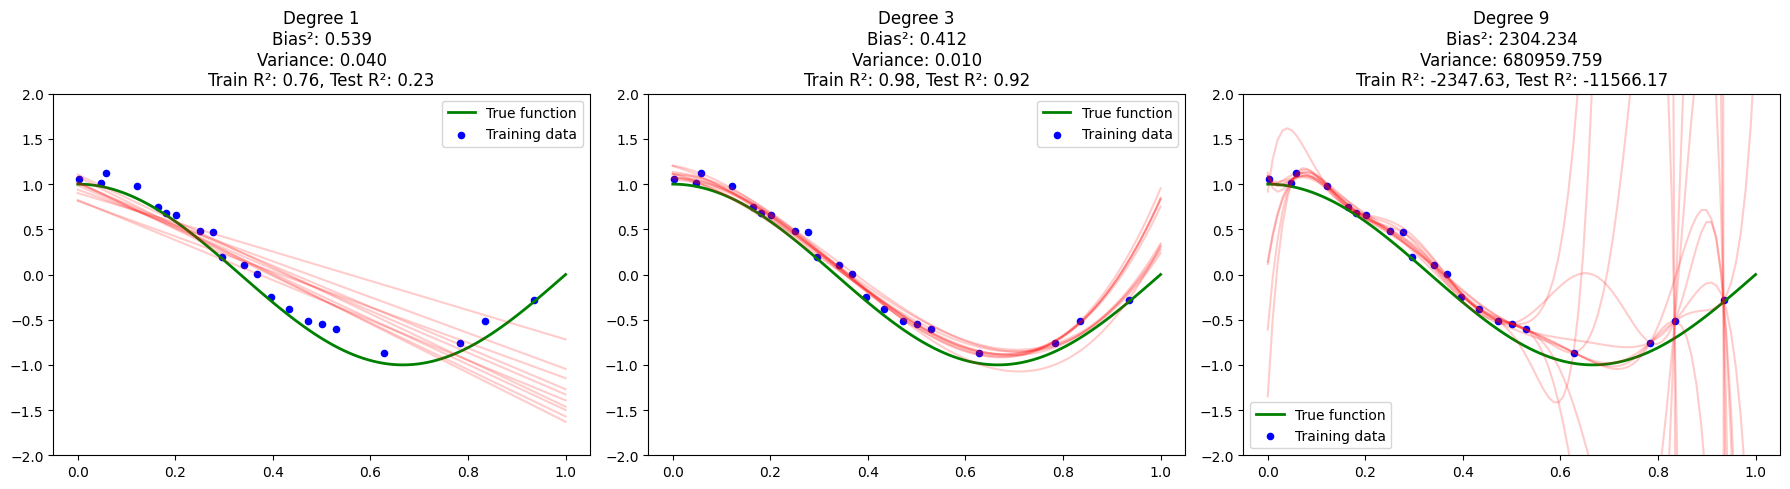


Model Performance Metrics:
Degree     Bias²      Variance   Total Error Train R²        Test R²        
1          0.539      0.040      0.579      0.759           0.233          
3          0.412      0.010      0.421      0.985           0.917          
9          2304.234   680959.759 683263.992 -2347.633       -11566.169     


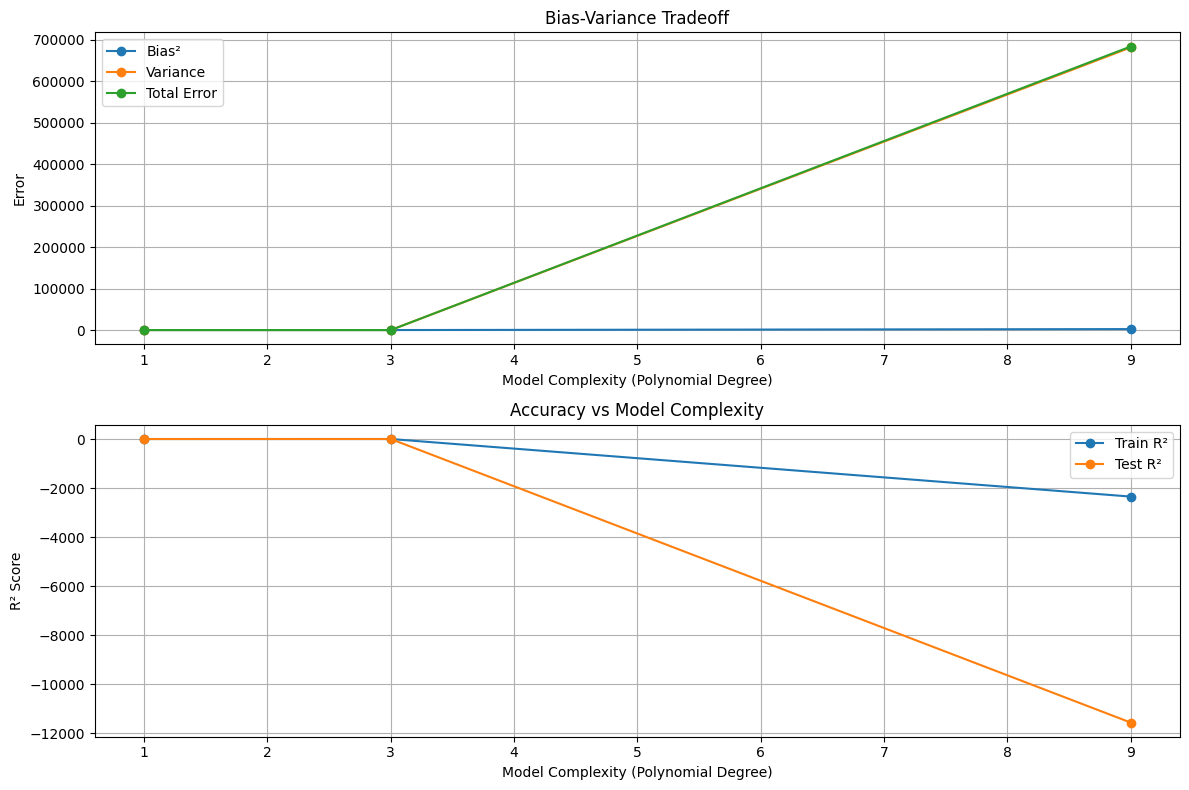

In [10]:
degrees = [1,3,9]
results = []
plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees):

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Calculate metrics
    metrics = calculate_model_metrics(model, X_train, y_train, X_test, true_function(X_test))
    results.append({"degree": degree, **metrics})
    # print(results)
    # Plot model fits
    plt.subplot(1, 3, i+1)
    
    # Plot true function
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, true_function(X_plot), label="True function", color='green', linewidth=2)
    
    # Plot 10 different fits
    for _ in range(10):
        idx = np.random.choice(len(X_train), len(X_train), replace=True)
        model.fit(X_train[idx], y_train[idx])
        y_plot = model.predict(X_plot.reshape(-1, 1))
        plt.plot(X_plot, y_plot, color='red', alpha=0.2)
    
    # Plot data points
    plt.scatter(X_train, y_train, color='blue', s=20, label="Training data")
    
    # Add metrics to title
    title = f"Degree {degree}\n"
    title += f"Bias²: {metrics['bias_squared']:.3f}\n"
    title += f"Variance: {metrics['variance']:.3f}\n"
    title += f"Train R²: {metrics['train_r2']:.2f}, Test R²: {metrics['test_r2']:.2f}"
    plt.title(title)
    plt.ylim(-2, 2)
    plt.legend()

plt.tight_layout()
plt.show()
## 4. Print detailed metrics table
print("\nModel Performance Metrics:")
print("{:<10} {:<10} {:<10} {:<10} {:<15} {:<15}".format(
    "Degree", "Bias²", "Variance", "Total Error", "Train R²", "Test R²"))
for r in results:
    print("{:<10} {:<10.3f} {:<10.3f} {:<10.3f} {:<15.3f} {:<15.3f}".format(
        r['degree'], r['bias_squared'], r['variance'], r['total_error'],
        r['train_r2'], r['test_r2']))

## 5. Plot bias-variance-accuracy tradeoff
plt.figure(figsize=(12, 8))

# First subplot: Error components
plt.subplot(2, 1, 1)
degrees = [r['degree'] for r in results]
plt.plot(degrees, [r['bias_squared'] for r in results], 'o-', label='Bias²')
plt.plot(degrees, [r['variance'] for r in results], 'o-', label='Variance')
plt.plot(degrees, [r['total_error'] for r in results], 'o-', label='Total Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid()

# Second subplot: Accuracy metrics
plt.subplot(2, 1, 2)
plt.plot(degrees, [r['train_r2'] for r in results], 'o-', label='Train R²')
plt.plot(degrees, [r['test_r2'] for r in results], 'o-', label='Test R²')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R² Score')
plt.title('Accuracy vs Model Complexity')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()